
🚀 訓練模型：Batch Size=16, Epochs=30
⏱ 訓練時間: 111.78 秒, 🎯 測試準確率: 0.9791

🚀 訓練模型：Batch Size=16, Epochs=40
⏱ 訓練時間: 175.12 秒, 🎯 測試準確率: 0.9807

🚀 訓練模型：Batch Size=16, Epochs=50
⏱ 訓練時間: 167.25 秒, 🎯 測試準確率: 0.9795

🚀 訓練模型：Batch Size=32, Epochs=30
⏱ 訓練時間: 57.02 秒, 🎯 測試準確率: 0.9804

🚀 訓練模型：Batch Size=32, Epochs=40
⏱ 訓練時間: 74.53 秒, 🎯 測試準確率: 0.9798

🚀 訓練模型：Batch Size=32, Epochs=50
⏱ 訓練時間: 92.50 秒, 🎯 測試準確率: 0.9775

🚀 訓練模型：Batch Size=64, Epochs=30
⏱ 訓練時間: 31.24 秒, 🎯 測試準確率: 0.9790

🚀 訓練模型：Batch Size=64, Epochs=40
⏱ 訓練時間: 41.30 秒, 🎯 測試準確率: 0.9812

🚀 訓練模型：Batch Size=64, Epochs=50
⏱ 訓練時間: 54.68 秒, 🎯 測試準確率: 0.9779


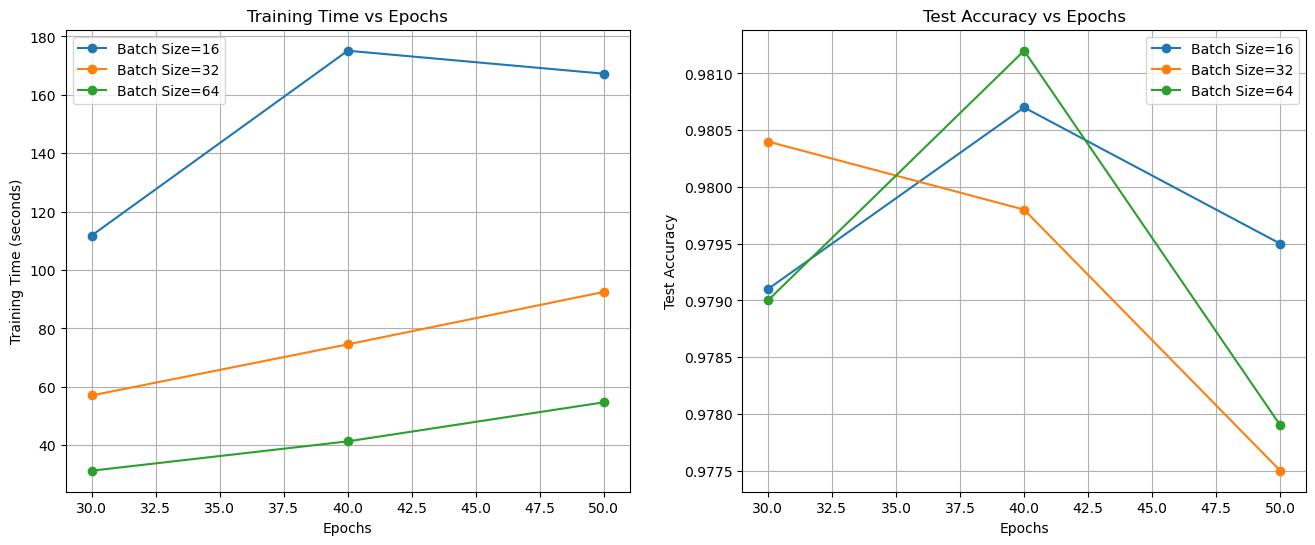

In [5]:
# 匯入必要的函式庫
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

# 1️⃣ 載入 MNIST 數據集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2️⃣ 數據預處理
x_train = x_train.reshape(60000, 28 * 28).astype('float32') / 255
x_test = x_test.reshape(10000, 28 * 28).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3️⃣ 建立神經網路模型（固定架構）
def build_model():
    model = Sequential()
    model.add(Input(shape=(784,)))  # 🔹 使用 Input() 定義輸入層
    model.add(Dense(128, activation='relu'))  # 固定 128 個神經元
    model.add(Dense(10, activation='softmax'))  # 分類問題的輸出層，使用 Softmax

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])  # 🔹 使用 Accuracy 作為評估指標
    
    return model

# 4️⃣ 設定不同的 batch size 與 epochs
batch_sizes = [ 16, 32, 64]  # 批次大小
epochs_list = [ 30, 40, 50]  # 訓練回合數

# 儲存結果
results = {}

# 5️⃣ 訓練不同的 batch size 與 epoch 組合
for batch_size in batch_sizes:
    for epochs in epochs_list:
        print(f"\n🚀 訓練模型：Batch Size={batch_size}, Epochs={epochs}")

        # 建立新模型
        model = build_model()
        
        # 記錄訓練時間
        start_time = time.time()
        
        # 訓練模型
        history = model.fit(x_train, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_data=(x_test, y_test),
                            verbose=0)
        
        training_time = time.time() - start_time  # 計算訓練時間
        
        # 取得最終測試準確率
        test_acc = model.evaluate(x_test, y_test, verbose=0)[1]

        # 儲存結果
        results[(batch_size, epochs)] = {
            "Training Time (s)": training_time,
            "Test Accuracy": test_acc
        }
        
        print(f"⏱ 訓練時間: {training_time:.2f} 秒, 🎯 測試準確率: {test_acc:.4f}")

# 6️⃣ 視覺化結果：繪製 訓練時間 & 測試準確率 圖表
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 📌 訓練時間圖表
for batch_size in batch_sizes:
    time_values = [results[(batch_size, epochs)]["Training Time (s)"] for epochs in epochs_list]
    axes[0].plot(epochs_list, time_values, marker='o', label=f'Batch Size={batch_size}')

axes[0].set_title("Training Time vs Epochs")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Training Time (seconds)")
axes[0].legend()
axes[0].grid()

# 📌 測試準確率圖表
for batch_size in batch_sizes:
    acc_values = [results[(batch_size, epochs)]["Test Accuracy"] for epochs in epochs_list]
    axes[1].plot(epochs_list, acc_values, marker='o', label=f'Batch Size={batch_size}')

axes[1].set_title("Test Accuracy vs Epochs")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Test Accuracy")
axes[1].legend()
axes[1].grid()

plt.show()
